In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
df=load_boston()
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
data=pd.DataFrame(df.data,columns=df.feature_names)


In [4]:
data['Price']=df.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Linear Regression

liner regression s the simplest machine learning and can be applied in many usecases with little modification like polynomial linear regression
### formula 
#### y=mx+c  ==> For a regression with single feature(simple Linear Regression) 
#### In case of multiple features (x1,x2,x3,x4...xn) <br> y=m1x1 + m2x2 +.....mnxn + m0

### Cost Function :
 sum(sqr(Xi - X.mean)) / n   <br> for i=0 to i=n

##### Linear Regression Uses Gradient Descent to Optimize the cost function by simultaneous upation of weights 
m := m-(dF/dm)*alpha <br>
here : m :  the weight to be updated , F is cost function ,dF/dm : derivative of cost function wrt m->the weight<br>
alpha : learning rate (e.g. 0.001,0.01,0.1,1...etc)
<br>The updation is monitonic

In [5]:
# 1. perform Train Test Split
# 2. standardize the data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split as tts
x=data.iloc[:,:-1]
y=data.iloc[:,-1:]
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [6]:
x_train_scaled

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
lreg=LinearRegression()
mse=cross_val_score(lreg,x_train_scaled,y_train,scoring='neg_mean_squared_error',cv=5)

print(np.mean(mse))
lreg.fit(x_train_scaled,y_train)
result=lreg.predict(x_train_scaled)


-23.65441827030464


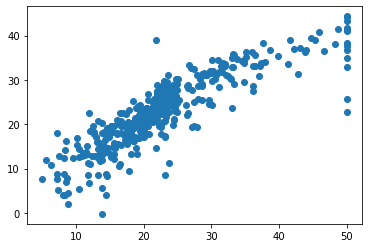

In [8]:
plt.scatter(y_train,result)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

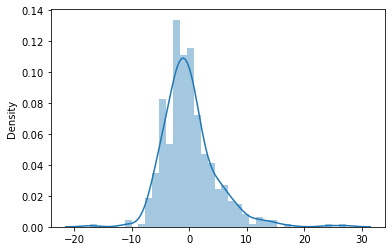

In [9]:
sns.distplot(y_train-result)

###### Test data


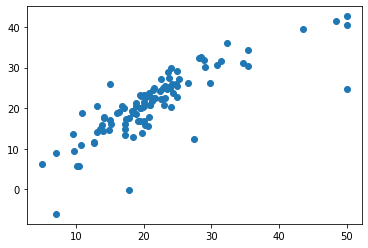

In [10]:
test_result=lreg.predict(x_test_scaled)
plt.scatter(y_test,test_result)

C:\Users\vikash arya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

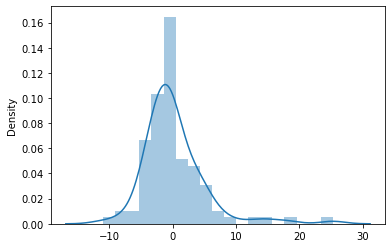

In [11]:
sns.distplot(y_test-test_result)

# Ridge Regression
It can be said a better version of linear regression ...when our model is overfitting.Ridge tries to reduce the stipness of the slope of linear line.<br>
overfitting --> Low bias,High Variance<br>
Ridge uses L2 norm regularization<br>
Ridge  increases the biase and reduces the variance to  more generalized values
difference from Linear Regression :<br>
##### Formula
cost function=(costFn of Linear reg) + lambda(weight**2)
<br>in case of multiple weights or slope =>w1^2+w2^2+...
<br>L2 norm => square of weights

In [12]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,8,10,20,40,60,80,100,200]}
ridge_reg=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 20, 40, 60, 80, 100, 200]},
             scoring='neg_mean_squared_error')

In [13]:
print(ridge_reg.best_params_)
print(ridge_reg.best_score_)

{'alpha': 1}
-23.648754583027632


# Lasso
In statistics and machine learning, lasso is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.<br><br>
Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. <br>
##### Formula
costfunction=(costFn ofLirear reg)+aplha(slope)<br>
L1 norm=> slope magnitude is added <br>
slope = weights...

In [14]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-5,1e-3,1e-2,1,5,8,10,20,40,60,80,100,200]}
lasso_reg=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(x_train_scaled,y_train)

C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 471.00233422401107, tolerance: 2.764448730650155
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 235.18419136036755, tolerance: 2.710494922600619
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 441.74666847797835, tolerance: 2.729756922600619
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descen

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 20, 40, 60, 80, 100, 200]},
             scoring='neg_mean_squared_error')

In [15]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-23.654418270304685


## Without standardization data

In [17]:
reg=LinearRegression()
score=cross_val_score(reg,x,y,scoring='neg_mean_squared_error',cv=5)
print(score.mean())

-37.13180746769922


In [19]:
##########Ridge with non standardized data#################
ridge1=Ridge()
ridge_=GridSearchCV(ridge1,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 20, 40, 60, 80, 100, 200]},
             scoring='neg_mean_squared_error')

In [20]:
print(ridge_.best_params_,ridge_.best_score_)

{'alpha': 200} -29.82912428855546


In [23]:
###############Lasso without standard data##########
lasso1=Lasso()
lasso_=GridSearchCV(lasso1,parameters,scoring='neg_mean_squared_error',cv=15)
lasso_.fit(x,y)

C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5117.227264336658, tolerance: 4.120191957627119
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4708.426791645017, tolerance: 4.174993050847458
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5163.7492229921845, tolerance: 4.164359455508475
  model = cd_fast.enet_coordinate_descent(
C:\Users\vikash arya\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.

GridSearchCV(cv=15, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.001, 0.01, 1,
                                   5, 8, 10, 20, 40, 60, 80, 100, 200]},
             scoring='neg_mean_squared_error')

In [24]:
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

{'alpha': 1e-15}
-23.654418270304685
